In [2]:
import pandas as pd
import numpy as np

In [3]:
dataframe = pd.read_csv("Task1.csv")

In [4]:
dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# summary

dataframe.sum()

Hours      125.3
Scores    1287.0
dtype: float64

In [6]:
import seaborn as sns

Hours     0
Scores    0
dtype: int64

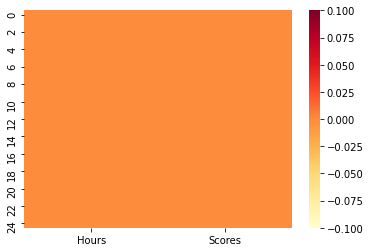

In [7]:
#checking for null values using heatmap
# which concludes that there are no null values present

sns.heatmap(dataframe.isnull(), cmap="YlOrRd")
dataframe.isnull().sum()

In [8]:
# splitting the dataset 

X=dataframe.iloc[:, :1]
X



,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [9]:
y = dataframe.iloc[:, 1:2]
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


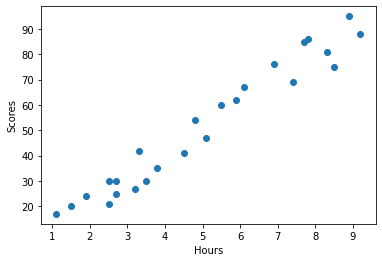

In [10]:
# visualising the data

import matplotlib.pyplot as plt

plt.scatter(dataframe['Hours'], dataframe['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [11]:
dataframe.corr('pearson')          #returns a dataframedataframe.predict

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
y_test

,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24


In [14]:
# model training

from sklearn.linear_model import LinearRegression


# create linear regression object

training_model = LinearRegression()


In [15]:
training_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_predict = training_model.predict(X_test)
y_predict

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

In [17]:
training_model.predict(y_test)

array([[200.76577104],
       [270.35751942],
       [687.90800968],
       [300.18255444],
       [618.3162613 ],
       [349.89094614],
       [240.5324844 ]])

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

SE=mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(SE)
print("Root mean square error is : " , RMSE)

Root mean square error is :  4.5092043283688055


In [19]:
r_sq = r2_score(y_test, y_predict)
print("R^2 is :", r_sq)

R^2 is : 0.9367661043365055


In [21]:
print("Intercept of line of best fit is : ", training_model.intercept_)
print("Slope of line of best fit is : ", training_model.coef_)

Intercept of line of best fit is :  [1.93220425]
Slope of line of best fit is :  [[9.94167834]]


In [22]:
# predicting the score for a student who studies 9.25 hours a day

new_x = np.array([9.25])
new_x1 = np.reshape(new_x, [-1, 1])
new_y = training_model.predict(new_x1)
new_y

array([[93.89272889]])

In [30]:
best_x = np.linspace(1.1, 9.25)
best_x

array([1.1       , 1.26632653, 1.43265306, 1.59897959, 1.76530612,
       1.93163265, 2.09795918, 2.26428571, 2.43061224, 2.59693878,
       2.76326531, 2.92959184, 3.09591837, 3.2622449 , 3.42857143,
       3.59489796, 3.76122449, 3.92755102, 4.09387755, 4.26020408,
       4.42653061, 4.59285714, 4.75918367, 4.9255102 , 5.09183673,
       5.25816327, 5.4244898 , 5.59081633, 5.75714286, 5.92346939,
       6.08979592, 6.25612245, 6.42244898, 6.58877551, 6.75510204,
       6.92142857, 7.0877551 , 7.25408163, 7.42040816, 7.58673469,
       7.75306122, 7.91938776, 8.08571429, 8.25204082, 8.41836735,
       8.58469388, 8.75102041, 8.91734694, 9.08367347, 9.25      ])

In [31]:
best_x1 = np.reshape(best_x, (-1, 1)) 
best_y = training_model.predict(best_x1)
print(best_y)

[[12.86805043]
 [14.52161529]
 [16.17518016]
 [17.82874503]
 [19.48230989]
 [21.13587476]
 [22.78943963]
 [24.44300449]
 [26.09656936]
 [27.75013423]
 [29.40369909]
 [31.05726396]
 [32.71082883]
 [34.36439369]
 [36.01795856]
 [37.67152343]
 [39.32508829]
 [40.97865316]
 [42.63221803]
 [44.28578289]
 [45.93934776]
 [47.59291263]
 [49.24647749]
 [50.90004236]
 [52.55360723]
 [54.20717209]
 [55.86073696]
 [57.51430183]
 [59.16786669]
 [60.82143156]
 [62.47499643]
 [64.12856129]
 [65.78212616]
 [67.43569103]
 [69.08925589]
 [70.74282076]
 [72.39638563]
 [74.04995049]
 [75.70351536]
 [77.35708023]
 [79.01064509]
 [80.66420996]
 [82.31777483]
 [83.97133969]
 [85.62490456]
 [87.27846943]
 [88.93203429]
 [90.58559916]
 [92.23916403]
 [93.89272889]]


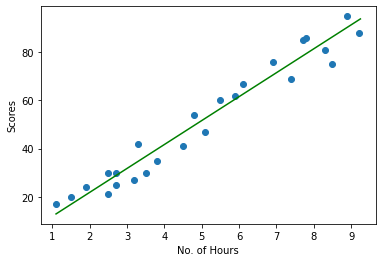

In [32]:
plt.scatter(dataframe['Hours'], dataframe['Scores'])
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.plot(best_x, best_y, color = 'green')
plt.show()